# Linear Regression

In [2]:
# imports
%matplotlib inline
from matplotlib import pyplot as plt
import tensorflow as tf
import numpy as np
import random

# gif generation
import imageio
import os

## Basic Building Blocks

### Linear Model

In [3]:
def linreg(X, w, b):
    return (X @ w) + b

### Loss Function

In [4]:
def squared_loss(y_hat, y):
    return (y_hat - tf.reshape(y, y_hat.shape)) ** 2 / 2

## Visuals

### 2D Plot

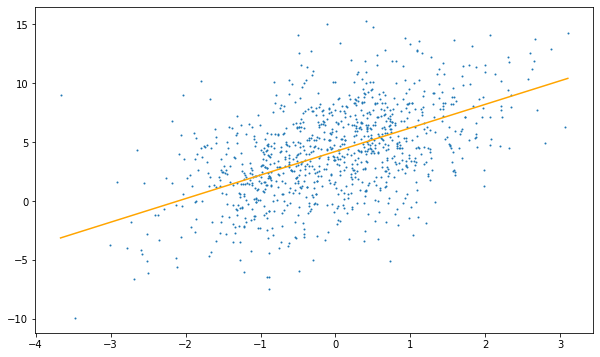

In [7]:
def plot2D(weight = true_w, bias= true_b, axis = 0):
    feat = features[:, axis].numpy()
    x = np.linspace(min(feat), max(feat), 100)
    plt.figure(figsize=(10, 6))
    plt.scatter(feat, labels.numpy(), 1);
    plt.plot(x, weight[axis,0] * x + bias, color="orange")

plot2D()

### 3D Plot

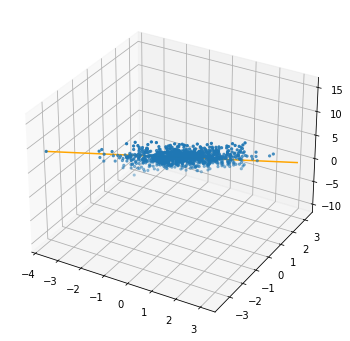

In [8]:
def plot3D(weights = true_w, bias = true_b):
    featx = features[:, 0].numpy()
    featy = features[:, 1].numpy()
    x = np.linspace(min(featx), max(featx), 100)
    y = np.linspace(min(featy), max(featy), 100)
    combination = tf.constant(np.vstack((x, y)).T, dtype=tf.float32)
    res = (combination @ weights) + bias
    fig = plt.figure(figsize=(6, 6))
    ax = fig.add_subplot(projection='3d')
    ax.scatter(features[:, 0].numpy(),features[:, 1].numpy(), labels.numpy(), marker=".");
    ax.plot(x, y, res.numpy().flatten(), color="orange")


plot3D()

## Dataset Generation

In [9]:
num_inputs = 2
num_examples = 1000

# y = w^T*x + b
# y = [2, -3,4]^T*[a,b] + 4.2
true_w = tf.constant([[2],[-3.4]]) # [2, -3,4]^T
true_b = 4.2 # 4.2

features = tf.random.normal((num_examples, num_inputs))
labels = (features @ true_w) + true_b 

true_w.shape, features.shape, labels.shape

(TensorShape([2, 1]), TensorShape([1000, 2]), TensorShape([1000, 1]))

## Training

### Batching

In [10]:
# generator over the dataset with a specified batch size
# every iteration gives another random batch
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    
    for i in range(0, num_examples, batch_size):
        j = tf.constant(indices[i: min(i + batch_size, num_examples)])
        yield tf.gather(features, j), tf.gather(labels,j)

In [11]:
for x,y in data_iter(10, features, labels):
    print( x,y)
    break

tf.Tensor(
[[-0.3419875  -0.81379896]
 [-0.35818103 -0.6658769 ]
 [ 0.36212364 -0.38885096]
 [ 0.1481155  -0.71904814]
 [-0.02774111 -0.49536973]
 [ 0.15093613  0.30300307]
 [-0.5796701  -1.5500004 ]
 [ 0.78012294  1.3291223 ]
 [ 1.0381017   0.7781282 ]
 [-0.08539966 -1.087361  ]], shape=(10, 2), dtype=float32) tf.Tensor(
[[6.2829413]
 [5.7476196]
 [6.2463403]
 [6.9409943]
 [5.8287745]
 [3.4716616]
 [8.310661 ]
 [1.24123  ]
 [3.630567 ]
 [7.7262278]], shape=(10, 1), dtype=float32)


### Training

epoch 1, loss 14.667238
epoch 2, loss 13.924996
epoch 3, loss 12.530316
epoch 4, loss 11.540657
epoch 5, loss 10.848619
epoch 6, loss 10.466502
epoch 7, loss 9.907508
epoch 8, loss 9.285525
epoch 9, loss 8.564440
epoch 10, loss 7.974990
epoch 11, loss 7.712132
epoch 12, loss 7.291867
epoch 13, loss 6.852466
epoch 14, loss 6.393652
epoch 15, loss 6.094299
epoch 16, loss 5.950725
epoch 17, loss 5.541767
epoch 18, loss 5.100004
epoch 19, loss 4.895664
epoch 20, loss 4.588801
epoch 21, loss 4.227897
epoch 22, loss 3.791798
epoch 23, loss 3.535084
epoch 24, loss 3.344062
epoch 25, loss 3.192067
epoch 26, loss 3.091987
epoch 27, loss 2.933358
epoch 28, loss 2.782173
epoch 29, loss 2.631204
epoch 30, loss 2.573945
epoch 31, loss 2.434186
epoch 32, loss 2.228789
epoch 33, loss 2.101970
epoch 34, loss 2.021188
epoch 35, loss 1.891217
epoch 36, loss 1.781350
epoch 37, loss 1.701962
epoch 38, loss 1.625904
epoch 39, loss 1.559445
epoch 40, loss 1.528826
epoch 41, loss 1.423995
epoch 42, loss 1.33

C:\Users\murphy\AppData\Local\Temp\ipykernel_17200\2281290535.py:32: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)


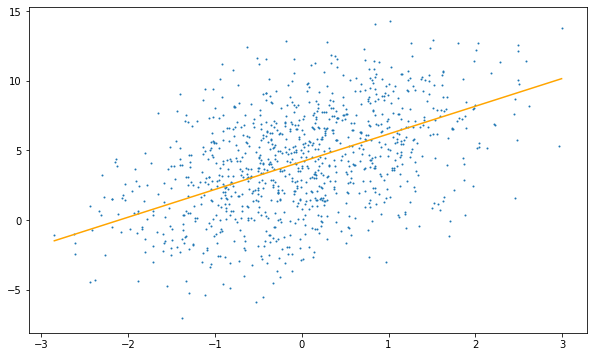

In [20]:
filenames = []

lr = 0.03  # Learning rate
num_epochs = 200 # Number of iterations
batch_size = 10

w = tf.Variable(tf.random.normal((num_inputs, 1), stddev=0.01))
b = tf.Variable(tf.zeros((1,)))

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        with tf.GradientTape() as tape:
            l = squared_loss(linreg(X, w, b),y)
            gradients = tape.gradient(l, [w,b])
            
            w.assign_sub(gradients[0]*lr/batch_size)
            b.assign_sub(gradients[1]*lr/batch_size)
        break
    
    train_l = squared_loss(linreg(features, w, b), labels)
    print('epoch %d, loss %f' % (epoch + 1, tf.reduce_mean(train_l).numpy()))
    
    filename = f'{epoch}.png'
    filenames.append(filename)
    #this makes a bunch of files
    plot2D(w,b)
    plt.savefig(filename)
    plt.close()

with imageio.get_writer(f'2d.gif', mode='I') as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)

#Remove files
for filename in set(filenames):
    os.remove(filename)
plot2D(w, b)


In [18]:
print('Error in estimating w:\n', (true_w - w).numpy())
print('Error in estimating b:\n', (true_b - b).numpy())

Error in estimating w:
 [[ 0.00840616]
 [-0.01104188]]
Error in estimating b:
 [0.00926352]
